# Sistemas de Información Geográfica con R-Project
# Lección 1 
Modelos de Cambio Climatico Global (GCM) HadGEM2 - CC en el escenario más pesimista para la tierra, proyectado al año 2050, cod HG
1. Instalación de librerias especiales para el SIG
2. Cargar archivos en formato vector y raster
3. Visualizacion cartografica

In [2]:
library (raster) # Permite generar todas las operaciones en formato raster con R 
#install.packages ("raster")
library (maptools) # Permite manejar Informacion geografica en formato vector  y raster
#install.packages ("maptools") 
library (rgdal) # Versión de gdal para R
#install.packages ("rgdal") 

Definiendo el directorio de trabajo, es decir, llamando los datos en formato raster, cod WGS84!! 

In [3]:
setwd ("C:/Users/Administrador/Documents/Danny/R'Project/SIG_R/Leccion1/hg85tx50")

Cargar una capa raster de los datos raster almacenados, en este caso para el mes de enero (01) en formato .tif

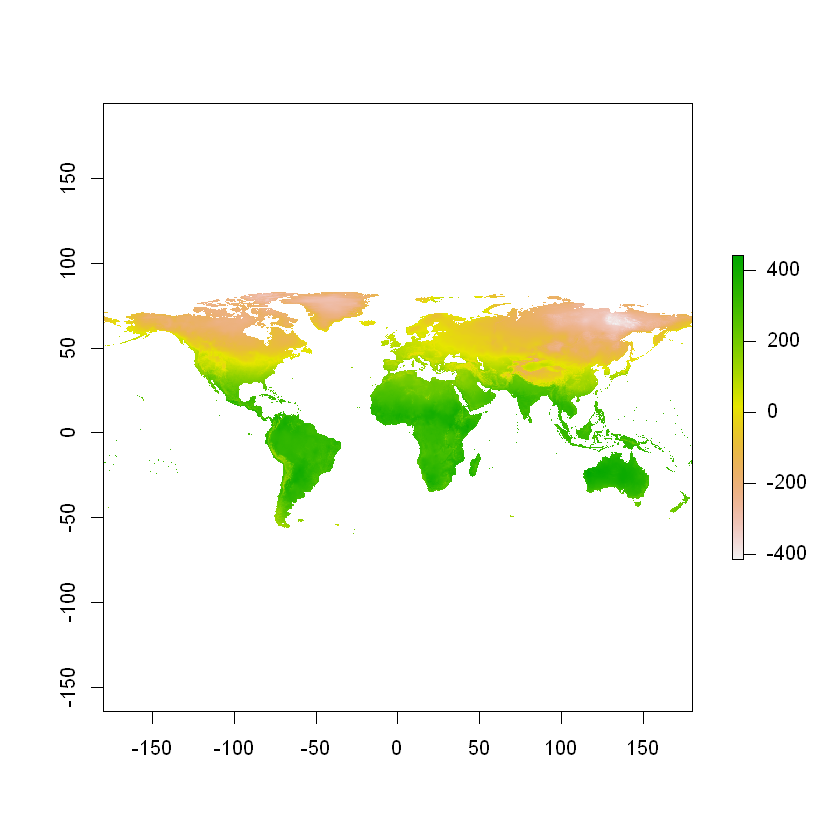

In [4]:
tm_enero <- raster ("hg85tx501.tif")
plot (tm_enero)

Cargar una capa de tipo poligono, mediante la funcion readOGR de la libreria (rgdal)

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\Administrador\Documents\Danny\R'Project\SIG_R\Leccion1\Deptos_WGS84\Deptos_WGS84\deptos_wgs84.shp", layer: "deptos_wgs84"
with 33 features
It has 5 fields


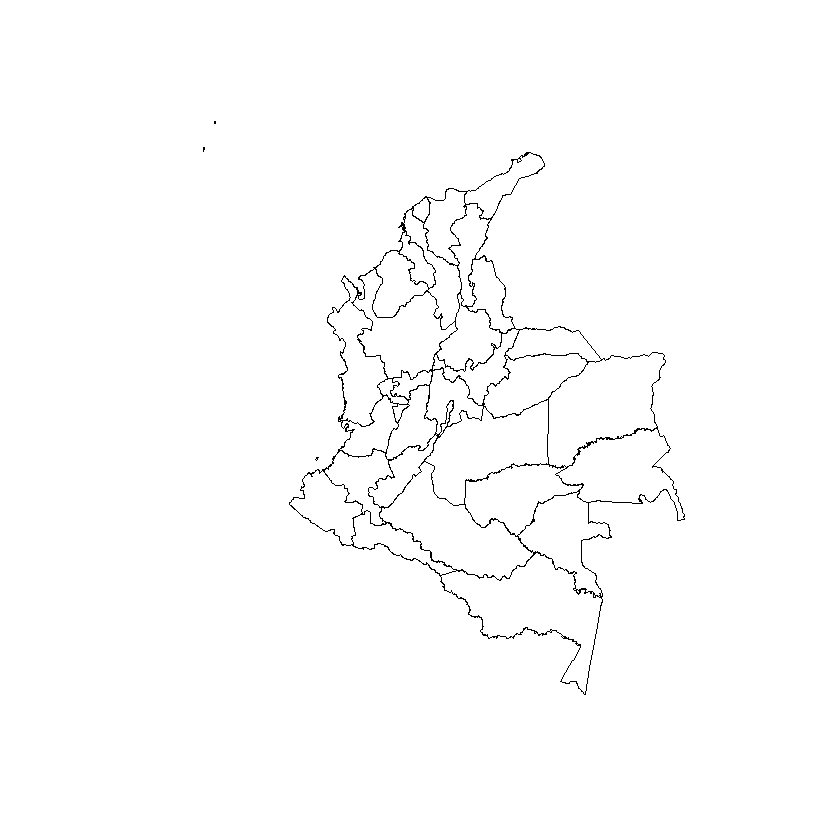

In [5]:
Col <- readOGR ("C:/Users/Administrador/Documents/Danny/R'Project/SIG_R/Leccion1/Deptos_WGS84/Deptos_WGS84/deptos_wgs84.shp")
plot (Col)

Cortar raster al area del poligono (GCM a Colombia), haciendo uso de la funcion "crop", recibe como argumentos a la capa raster seguido del poligono

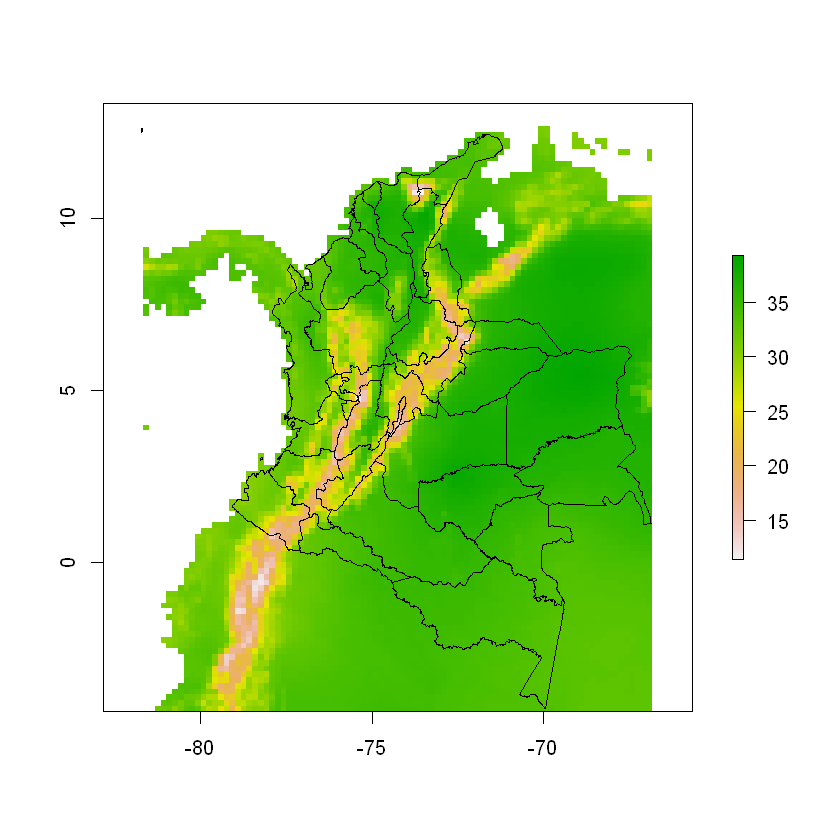

In [6]:
tm_enero_col <- crop (tm_enero, Col)
plot ((tm_enero_col/10))
plot (Col, add = TRUE)

Plotear raster y vector en un solo mapa 

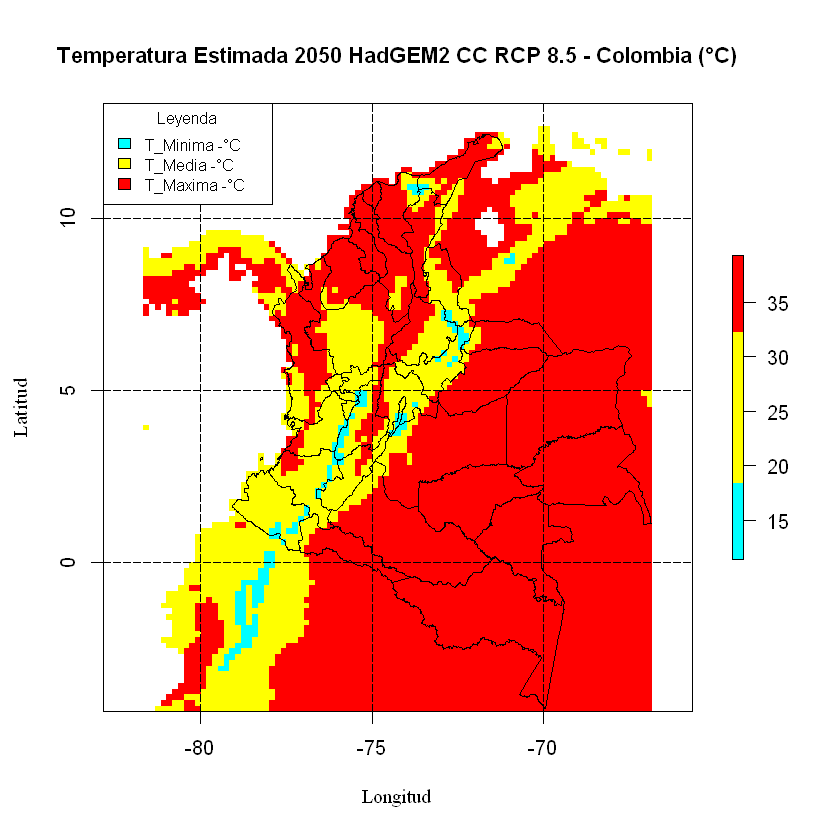

In [9]:
colores <- c ("cyan", "yellow", "red")
plot ((tm_enero_col/10), main = "Temperatura Estimada 2050 HadGEM2 CC RCP 8.5 - Colombia (°C)", 
      cex.main = 1.1, xlab = "Longitud", ylab = "Latitud", col.lab = "black", font.lab = 6, col = colores)
plot (Col, add = TRUE) 
grid (col = "black", lty = 5)
legend ("topleft", c ( "T_Minima -°C" , "T_Media -°C" , "T_Maxima -°C"), 
        cex = 0.8, fill = colores, title = "Leyenda", bty = "o")